<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML4_Knn_ex_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# **4. Classificação: Knn**
---



Após fazer os exercícios deste laboratório responda ao **questionário correspondente da aula no Moodle**.



# Caso: **Predição de Diagnósticos a partir de Dados de Imagens** 


https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Os dados acima são características computadas a partir de uma imagem digitalizada por *agulha fina* (PAAF) de uma massa mamária. Eles descrevem características dos núcleos celulares presentes na imagem e classificam os tumores como malignos ou benignos. 

Os dados estão na URL: https://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv





In [1]:
#@markdown **Set Up Lab** (*run this before continue*)

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 

breast = pd.read_csv('https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/data/breast.csv')

from sklearn.model_selection import train_test_split

seed = 1984
X_train, X_test, y_train, y_test = train_test_split(breast.drop(columns=['diagnosis']), breast.diagnosis, test_size=0.05, stratify=breast.diagnosis, random_state=seed)

breast = pd.concat([X_train, y_train],axis=1)
new_breast = X_test

breast.to_csv('breast.csv',index=False)

new_breast['diagnosis'] = '?'
new_breast.to_csv('new_breast.csv',index=False)

y_test.to_csv('new_breast_answers.csv',index=False)


E você empregará os dados já tratados no set up acima, com os dataframes `breast` e `new_breast`. A idea aqui é empregar os dados de `breast` para estimar as classes dos novos casos desconhecidos de `new_breast`. 



In [2]:
breast.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
411,8911670,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,...,24.30,129.00,1236.0,0.12430,0.1160,0.2210,0.12940,0.2567,0.05737,M
149,9047,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834,B
103,859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,19.23,65.59,310.1,0.09836,0.1678,0.1397,0.05087,0.3282,0.08490,B
260,864496,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,19.62,64.48,284.4,0.17240,0.2364,0.2456,0.10500,0.2926,0.10170,B
106,91505,12.540,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,0.1943,...,21.40,86.67,552.0,0.15800,0.1751,0.1889,0.08411,0.3155,0.07538,B


In [3]:
new_breast.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
274,862009,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,...,25.94,97.59,699.4,0.13390,0.17510,0.13810,0.07911,0.2678,0.06603,?
107,9110127,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,...,22.02,133.30,1292.0,0.12630,0.26660,0.42900,0.15350,0.2842,0.08225,?
264,90769601,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,...,20.29,74.35,421.1,0.10300,0.06219,0.04580,0.04044,0.2383,0.07083,?
175,909777,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,...,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736,?
215,904689,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,...,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247,?


# Exercício. Acesse e Explore os dados 

Qual o atributo classe? Quantos casos são **'B'enignos** e **'M'alignos**? Existem dados ausentes (Null ou NA)? 


In [4]:
# Seu código aqui 
breast = pd.read_csv('breast.csv')
display(breast.head())

new_breast = pd.read_csv('new_breast.csv')
display(new_breast.head())


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,8911670,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,...,24.30,129.00,1236.0,0.12430,0.1160,0.2210,0.12940,0.2567,0.05737,M
1,9047,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834,B
2,859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,19.23,65.59,310.1,0.09836,0.1678,0.1397,0.05087,0.3282,0.08490,B
3,864496,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,19.62,64.48,284.4,0.17240,0.2364,0.2456,0.10500,0.2926,0.10170,B
4,91505,12.540,16.32,81.25,476.3,0.11580,0.10850,0.05928,0.03279,0.1943,...,21.40,86.67,552.0,0.15800,0.1751,0.1889,0.08411,0.3155,0.07538,B


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,862009,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,...,25.94,97.59,699.4,0.13390,0.17510,0.13810,0.07911,0.2678,0.06603,?
1,9110127,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,...,22.02,133.30,1292.0,0.12630,0.26660,0.42900,0.15350,0.2842,0.08225,?
2,90769601,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,...,20.29,74.35,421.1,0.10300,0.06219,0.04580,0.04044,0.2383,0.07083,?
3,909777,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,...,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736,?
4,904689,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,...,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247,?


(513, 32)

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

B    322
M    191
Name: diagnosis, dtype: int64

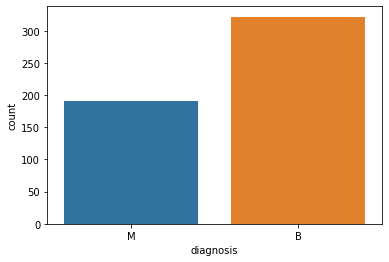

In [5]:
# Seu código aqui
display( breast.shape )

sns.countplot(breast.diagnosis)
display( breast.isnull().sum() )

display( breast.diagnosis.value_counts() )

# Exercício. Preparando os dados 

Prepare aqui os dados de entrada `X` e saída `y` do modelo. 

Note que há um atributo além do atributo classe que não é preditor (qual?). Remova esse atributo antes de normalizar os dados. Para normalização empregue o `MinMaxScaler()` do scikit-learn (ver no material de teoria exemplo de como aplicar). 

In [6]:
# Seu código aqui
from sklearn.preprocessing import MinMaxScaler

breast.drop(columns=['id'], inplace=True)
new_breast.drop(columns=['id'], inplace=True)

X = breast.drop(columns=['diagnosis'])
scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X) 
y = breast.diagnosis

# Exercício. Conjunto de Treinamento e Teste

Empregue a função `train_test_split` e separe 0.3 dos dados para teste. Empregue o `random_state=123` para garantir a reprodutibilidade dos resultados e empregue o parâmetro `stratify` para garantir a mesma distribuição das classes nos conjuntos de treinamento e teste.

In [7]:
# Seu código aqui
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)



In [8]:
X_train.mean()

0.23892049835003068

# Exercício. Treine seu modelo Knn 

Treine dois modelos Knn, um com k=3 e outro com k=11. Verifique a acuracidade de cada modelo para o conjunto de teste.





In [9]:
# Seu código aqui
from sklearn.neighbors import KNeighborsClassifier 

clf = KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

['M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'] ...
0.94


In [10]:
# Seu código aqui
from sklearn.neighbors import KNeighborsClassifier 

clf = KNeighborsClassifier(n_neighbors = 11)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'] ...
0.95


# Exercício. Classification Report

Produza o Classification report para o modelo com maior acuracidade obtido acima.

In [11]:
# Seu código aqui
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)
    
accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[94  3]
 [ 5 52]]

Score de Acuracidade (1):

0.95

Score de Acuracidade (2):

0.95

Classification Report:

              precision    recall  f1-score   support

           B       0.95      0.97      0.96        97
           M       0.95      0.91      0.93        57

    accuracy                           0.95       154
   macro avg       0.95      0.94      0.94       154
weighted avg       0.95      0.95      0.95       154



In [14]:
94/97

0.9690721649484536

# Exercício. Prevendo novos Casos

Empregue o melhor modelo obtido acima para classificar os novos casos de `new_breast`. Quantos casos benignos e malignos você encontra? 

**Dica**: verifique que os dados dos novos casos precisam estar no mesmo *formato* dos dados empregados no treinamento. Verifique por exemplo os valores de X_train, X_test e compare com os dados de `new_breast`. Veja que os dados parecem estar muito diferentes agora, por que? 

In [12]:
# Seu código aqui 
X_test = new_breast.drop(columns=['diagnosis'])       # Dados para predição
X_test = scaler.transform(X_test)                     # Normalizando os dados aqui!

y_pred = clf.predict(X_test)                          # Resposta do modelo

print(y_pred)

['B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B']


In [13]:
# Seu código aqui
print('Bs =', sum(y_pred == 'B'))
print('Ms =', sum(y_pred == 'M'))

Bs = 17
Ms = 10
